In [249]:
import importlib
import UAM_Schedule
importlib.reload(UAM_Schedule)
import spill_op
importlib.reload(spill_op)
from UAM_Schedule import UAM_Schedule
from op import number_aircrafts_lp_v2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spill_op import spill_op

In [101]:
import re
with open(f'../output/demand_variation/fleet_op_result/alpha_7/{10}_{13}_fleetsize.txt'.format(month, day), 'r') as f:
            fleetsize = int(float(re.search(r'\d+(\.\d+)?', f.readline())[0]))

In [102]:
fleetsize

15

In [91]:
flight_schedule = pd.read_csv('../output/demand_variation/schedule/alpha_7/10_13.csv')
occupancy = pd.read_csv('../output/demand_variation/schedule/alpha_7/num_pax_10_13.csv')

In [103]:
spill_op(flight_schedule, occupancy, schedule_time_step=288, fleet_size=12, output_path='')

Set parameter Threads to value 2
Set parameter Method to value 2
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 2 threads

Optimize a model with 22075 rows, 346290 columns and 705764 nonzeros
Model fingerprint: 0xa0b6b260
Variable types: 0 continuous, 346290 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 2496 rows and 7348 columns
Presolve time: 0.55s
Presolved: 19579 rows, 338942 columns, 691616 nonzeros
Variable types: 0 continuous, 338942 integer (18 binary)
Root barrier log...

Ordering time: 0.37s

Barrier statistics:
 AA' NZ     : 3.653e+05
 Factor NZ  : 6.183e+06 (roughly 200 MB of memory)
 Factor Ops : 2.607e+09 (less than 1 second per iteration)
 

AttributeError: Unable to retrieve attribute 'x'

In [223]:
month = 5
day = 12
month = month+201900

lax_flight_arr = a.lax_flight[(a.lax_flight['ON_YYYYMM'] == month) & (a.lax_flight['ON_DAY'] == day) & (a.lax_flight['ARR_LOCID'] == ' LAX')]
lax_flight_arr['time'] = lax_flight_arr['T_OOOI_ARR'].dt.hour * 60 + lax_flight_arr['T_OOOI_ARR'].dt.minute
lax_flight_arr = lax_flight_arr.sort_values('time').reset_index(drop=True)
lax_flight_dep = a.lax_flight[(a.lax_flight['ON_YYYYMM'] == month) & (a.lax_flight['ON_DAY'] == day) & (a.lax_flight['DEP_LOCID'] == ' LAX')]
lax_flight_dep['time'] = lax_flight_dep['T_OAG_S_DE'].dt.hour * 60 + lax_flight_dep['T_OAG_S_DE'].dt.minute
lax_flight_dep = lax_flight_dep.sort_values('time').reset_index(drop=True)

In [224]:
np.random.seed(1000)
auto_regressive_alpha = 0 

yearly_arr_capacity, yearly_dep_capacity = a.yearly_capacity
directional_demand = 1500
# Calculate pax demand per scheduled flight
lax_flight_arr['capacity'] = lax_flight_arr['capacity']/yearly_arr_capacity * directional_demand * 365
lax_flight_dep['capacity'] = lax_flight_dep['capacity']/yearly_dep_capacity * directional_demand * 365

lax_flight_arr = get_autoregressive_pax_count(lax_flight_arr, auto_regressive_alpha)
lax_flight_dep = get_autoregressive_pax_count(lax_flight_dep, auto_regressive_alpha)

In [231]:
lax_dtla = np.empty((1,))
for i in range(lax_flight_arr.shape[0]):
    num_pax = lax_flight_arr.iloc[i,1]
    delta_t = skewnorm.rvs(3, loc=31, scale=np.sqrt(2*1.5**2), size=num_pax)
    delta_t += lax_flight_arr.iloc[i,0]
    lax_dtla = np.concatenate([lax_dtla, delta_t])
lax_dtla[lax_dtla >= 1440] -= 1440
lax_dtla = np.sort(lax_dtla)
len(lax_dtla)
build_schedules(lax_dtla, 5)[1].sum()

1481

In [250]:
a = UAM_Schedule('LAX_ind.csv', 'T_F41SCHEDULE_B43.csv')

In [253]:
w = []
for i in range(10):
    d,b,c = a.get_one_day(5,12, 0.5)
    w.append(d.shape[0])
    

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([757.5 , 757.55, 757.6 , 757.65, 757.7 , 757.75, 757.8 , 757.85,
        757.9 , 757.95, 758.  , 758.05, 758.1 , 758.15, 758.2 , 758.25,
        758.3 , 758.35, 758.4 , 758.45, 758.5 ]),
 <BarContainer object of 20 artists>)

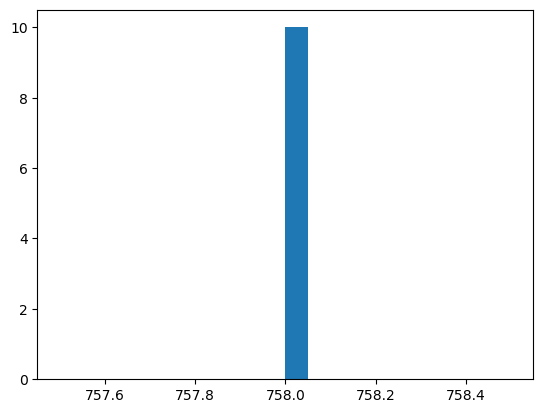

In [254]:
import matplotlib.pyplot as plt
plt.hist(w, bins=20)

In [104]:
month = 7
day = 13
month = month+201900

lax_flight_arr = a.lax_flight[(a.lax_flight['ON_YYYYMM'] == month) & (a.lax_flight['ON_DAY'] == day) & (a.lax_flight['USER_CLASS'] == 'C') & (a.lax_flight['ARR_LOCID'] == ' LAX')]
lax_flight_arr['time'] = lax_flight_arr['T_OOOI_ARR'].dt.hour * 60 + lax_flight_arr['T_OOOI_ARR'].dt.minute
lax_flight_arr = lax_flight_arr.sort_values('time').reset_index(drop=True)
lax_flight_dep = a.lax_flight[(a.lax_flight['ON_YYYYMM'] == month) & (a.lax_flight['ON_DAY'] == day) & (a.lax_flight['USER_CLASS'] == 'C') & (a.lax_flight['DEP_LOCID'] == ' LAX')]
lax_flight_dep['time'] = lax_flight_dep['T_OAG_S_DE'].dt.hour * 60 + lax_flight_dep['T_OAG_S_DE'].dt.minute
lax_flight_dep = lax_flight_dep.sort_values('time').reset_index(drop=True)

In [105]:
yearly_arr_capacity, yearly_dep_capacity = a.yearly_capacity
directional_demand = 1500

In [106]:
lax_flight_arr['capacity'] = lax_flight_arr['capacity']/yearly_arr_capacity * directional_demand * 365
lax_flight_dep['capacity'] = lax_flight_dep['capacity']/yearly_dep_capacity * directional_demand * 365

In [107]:
lax_flight_dep['capacity'].sum()

1212.131950719012

In [118]:
a.yearly_capacity

(50979807.0, 51263323.0)

In [113]:
a.lax_flight['DEP_YYYYMM'].unique()

array([202007, 201901, 201902, 201903, 201904, 201905, 201906, 201907,
       201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003,
       202004, 202006, 202005])

In [247]:
np.random.seed(10)

In [248]:
a.get_one_day(5,12)

(        schedule        od
 0       1.767731  LAX_DTLA
 1       3.486903  LAX_DTLA
 2       5.223555  LAX_DTLA
 3      12.052038  LAX_DTLA
 4      23.065060  LAX_DTLA
 ..           ...       ...
 789  1411.934015  DTLA_LAX
 790  1421.846723  DTLA_LAX
 791  1431.684488  DTLA_LAX
 792  1438.424998  DTLA_LAX
 793  1440.000000  DTLA_LAX
 
 [794 rows x 2 columns],
       passenger_id  passenger_arrival_time origin_vertiport_id  \
 0                0                  3761.0                DTLA   
 1                1                  4525.0                DTLA   
 2                2                  4652.0                DTLA   
 3                3                  4936.0                DTLA   
 4                4                  5361.0                DTLA   
 ...            ...                     ...                 ...   
 3011          3011                 86249.0                 LAX   
 3012          3012                 86284.0                 LAX   
 3013          3013               